In [162]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")



<h2>Title: Boston Housing Data</h2>
<p><strong>Sources:</strong></p>
<ul>
  <li>(a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.</li>
  <li>(b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.</li>
  <li>(c) Date: July 7, 1993</li>
</ul>
<p><strong>Past Usage:</strong></p>
<ul>
  <li>Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261.</li>
  <li>Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.</li>
</ul>
<p><strong>Relevant Information:</strong></p>
<p>Concerns housing values in suburbs of Boston.</p>
<p><strong>Number of Instances:</strong> 506</p>
<p><strong>Number of Attributes:</strong> 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.</p>
<p><strong>Attribute Information:</strong></p>
<ol>
  <li><strong>CRIM:</strong> per capita crime rate by town</li>
  <li><strong>ZN:</strong> proportion of residential land zoned for lots over 25,000 sq.ft.</li>
  <li><strong>INDUS:</strong> proportion of non-retail business acres per town</li>
  <li><strong>CHAS:</strong> Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
  <li><strong>NOX:</strong> nitric oxides concentration (parts per 10 million)</li>
  <li><strong>RM:</strong> average number of rooms per dwelling</li>
  <li><strong>AGE:</strong> proportion of owner-occupied units built prior to 1940</li>
  <li><strong>DIS:</strong> weighted distances to five Boston employment centres</li>
  <li><strong>RAD:</strong> index of accessibility to radial highways</li>
  <li><strong>TAX:</strong> full-value property-tax rate per 10,000</li>
  <li><strong>PTRATIO:</strong> pupil-teacher ratio by town</li>
  <li><strong>B:</strong> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
  <li><strong>LSTAT:</strong> % lower status of the population</li>
  <li><strong>MEDV:</strong> Median value of owner-occupied homes in $1000's</li>
</ol>
<p><strong>Missing Attribute Values:</strong> None.</p>

In [163]:
df = pd.read_csv('housing data.csv', header=None)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']



# Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [164]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [165]:
df.shape

(506, 14)

In [166]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [167]:
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

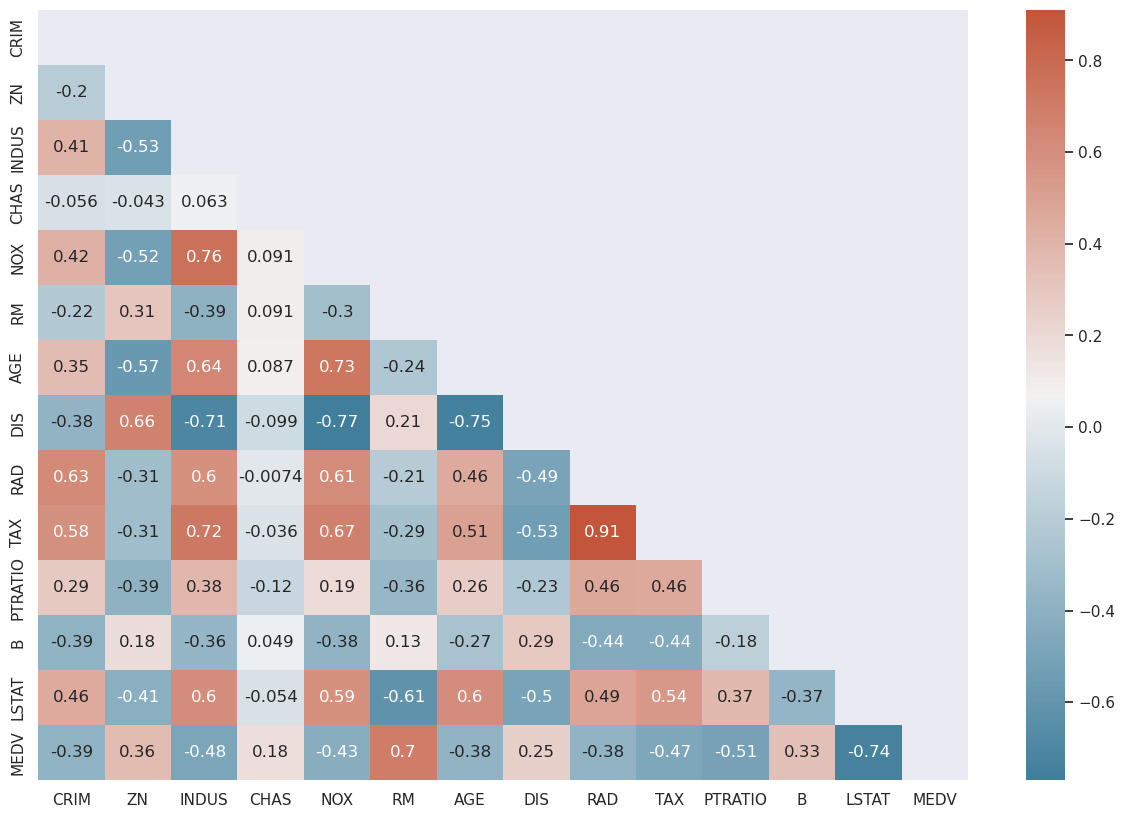

In [168]:
fig, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()



Text(0.5, 0.98, 'Distribució de les variables numèriques')

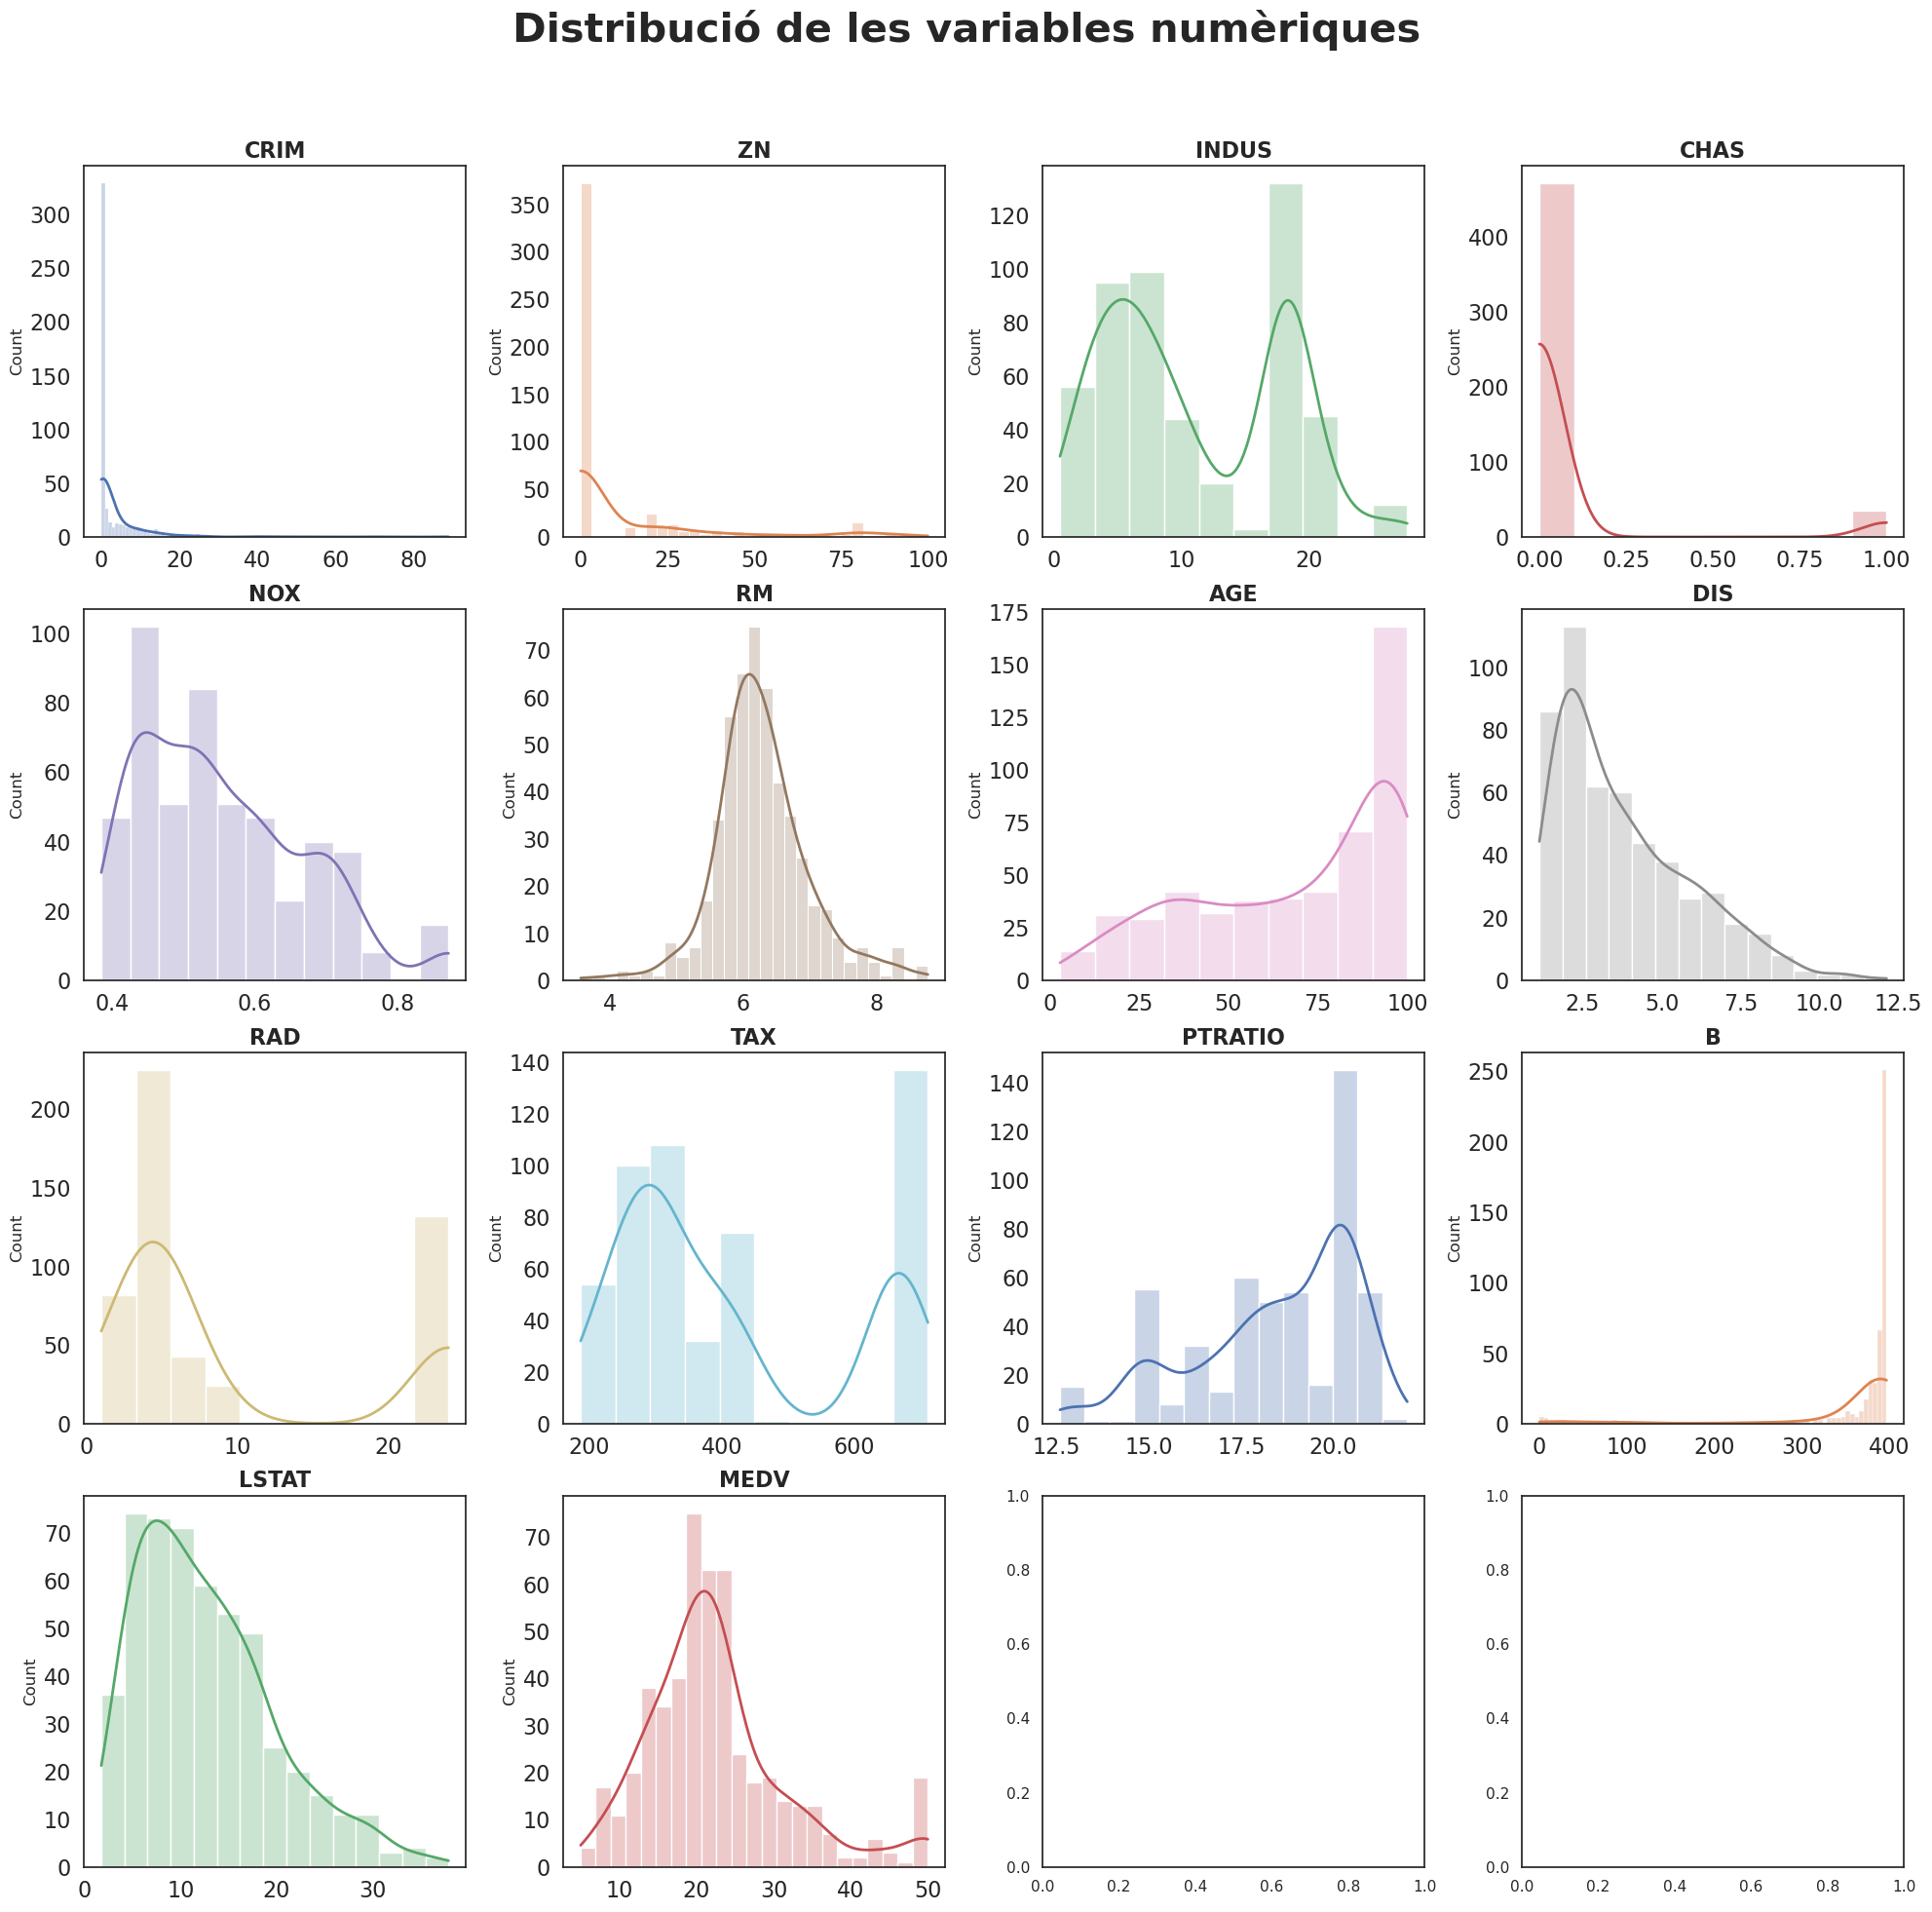

In [169]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns


for i, colum in enumerate(df):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribució de les variables numèriques', fontsize = 30, fontweight = "bold")


<Figure size 800x500 with 0 Axes>

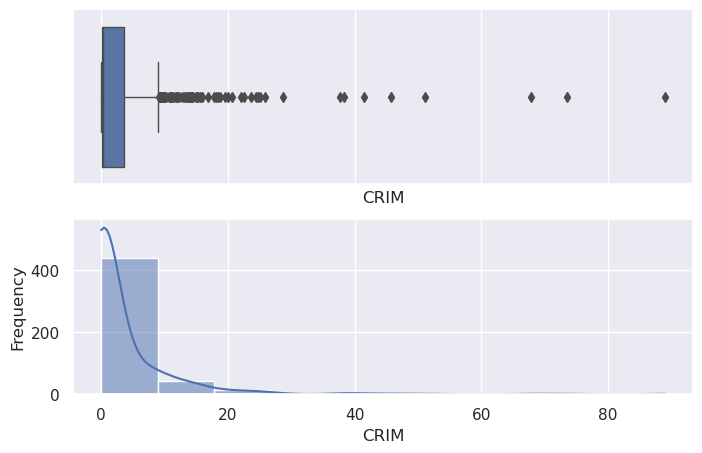

<Figure size 800x500 with 0 Axes>

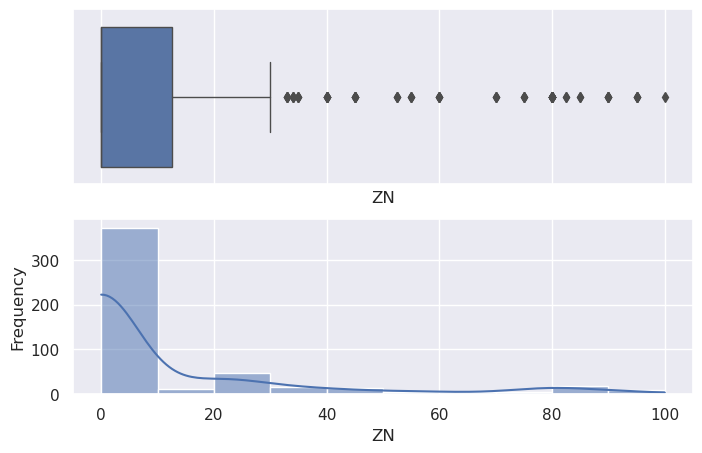

<Figure size 800x500 with 0 Axes>

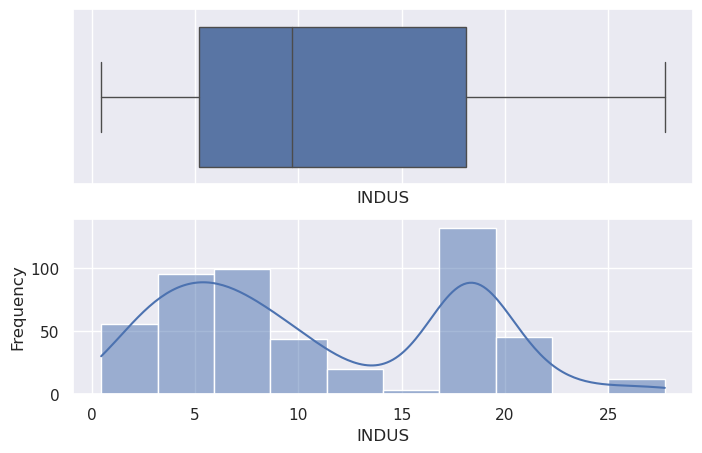

<Figure size 800x500 with 0 Axes>

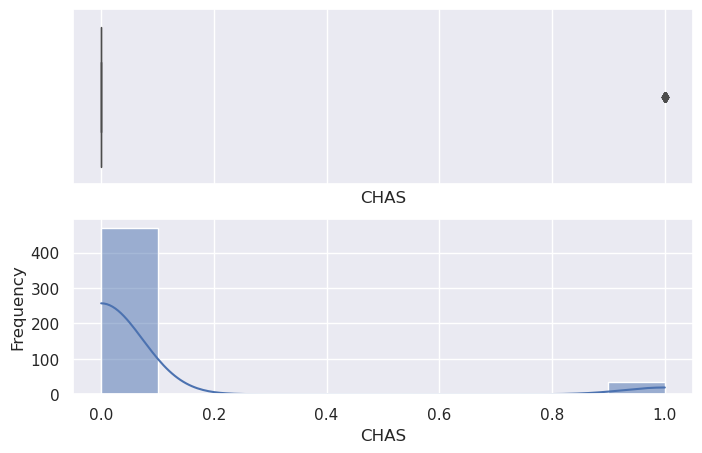

<Figure size 800x500 with 0 Axes>

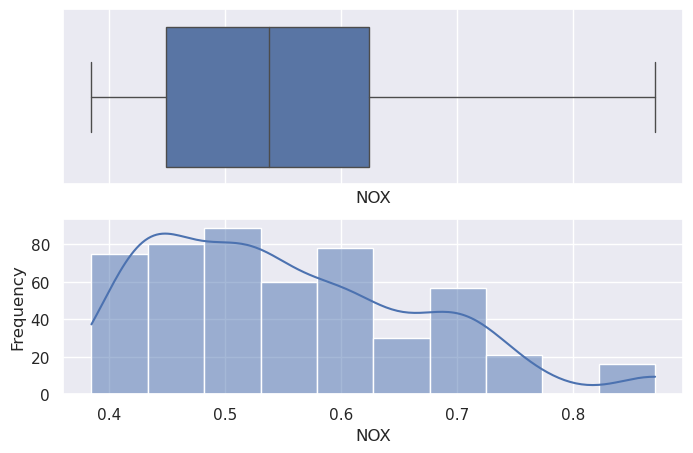

<Figure size 800x500 with 0 Axes>

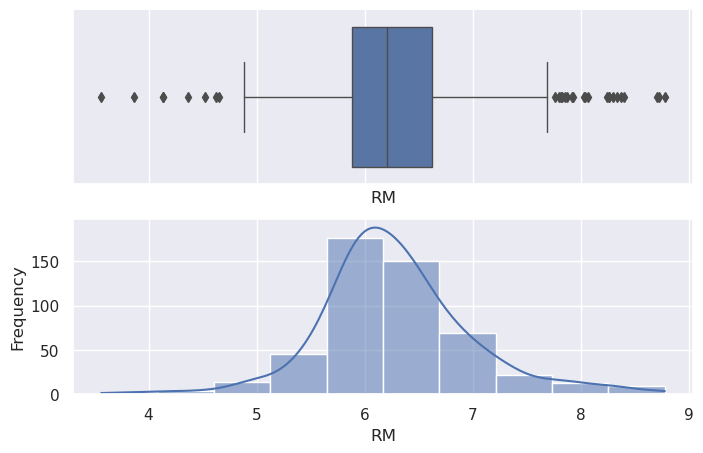

<Figure size 800x500 with 0 Axes>

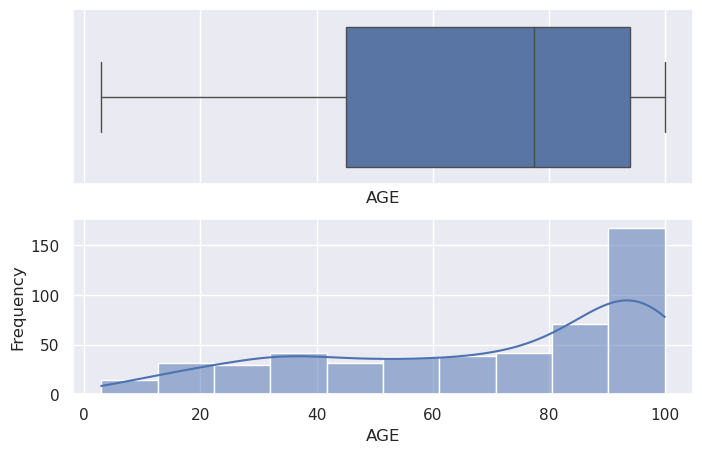

<Figure size 800x500 with 0 Axes>

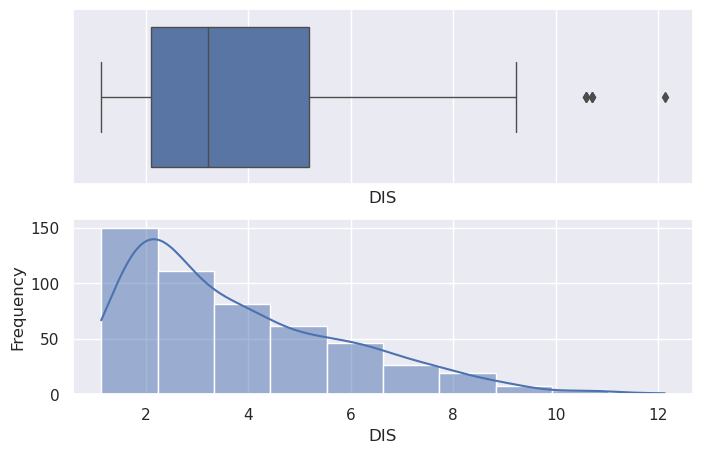

<Figure size 800x500 with 0 Axes>

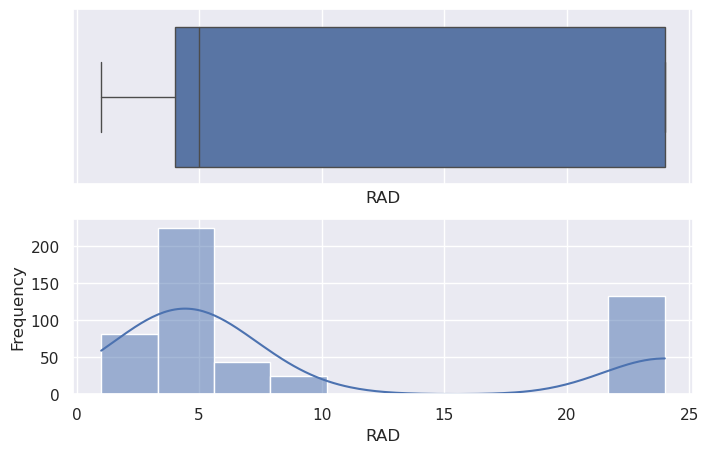

<Figure size 800x500 with 0 Axes>

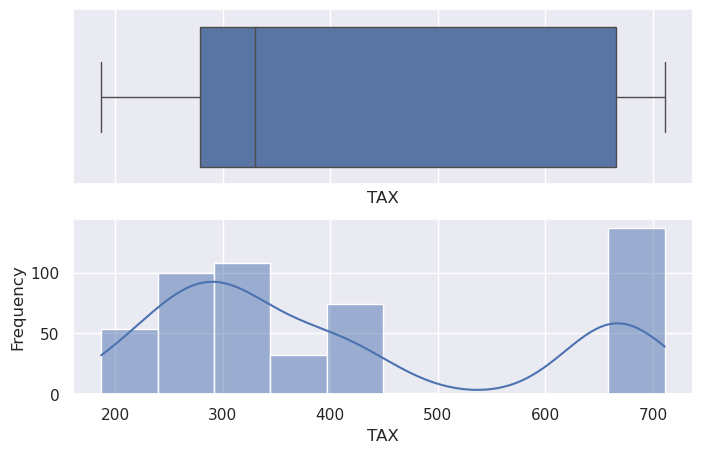

<Figure size 800x500 with 0 Axes>

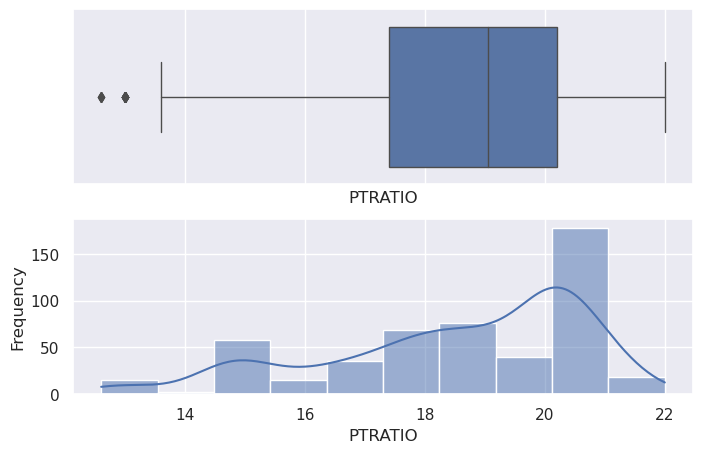

<Figure size 800x500 with 0 Axes>

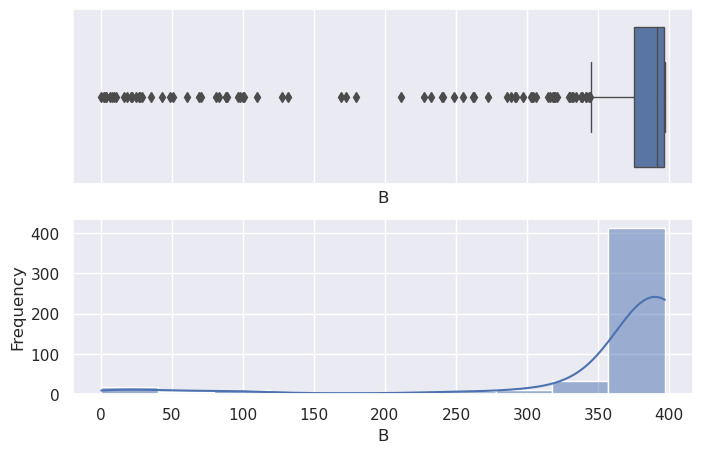

<Figure size 800x500 with 0 Axes>

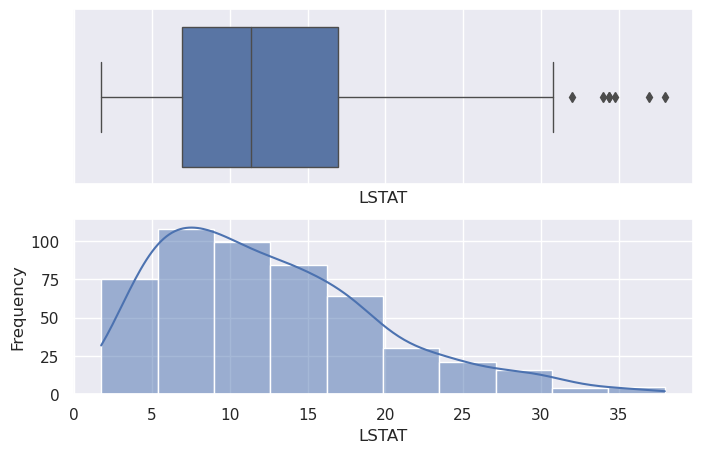

<Figure size 800x500 with 0 Axes>

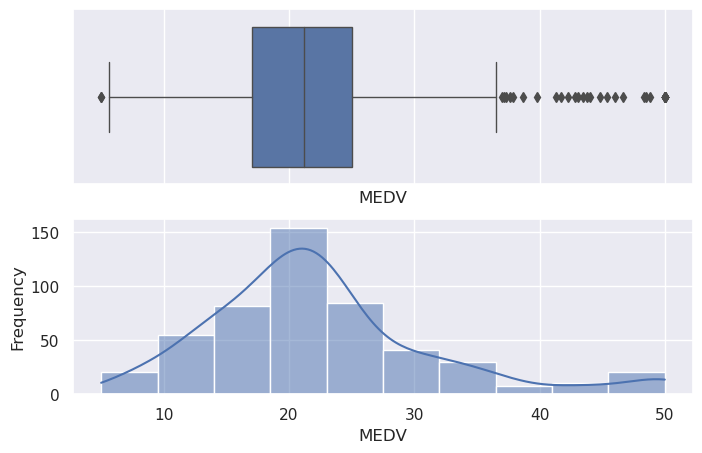

In [170]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [171]:
print('Hipotesis nula Ho -> La mostra té una distribució normal')
print('Hipotesis alternativa H1 -> La mostra no té una distribució normal\n\n')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('Per la variable ', i, "amb un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podem rebutjar hipotesis nula\n')
    else:
        print("Podem rebutjar l'hipotesis nula\n")
        



Hipotesis nula Ho -> La mostra té una distribució normal
Hipotesis alternativa H1 -> La mostra no té una distribució normal


Per la variable  CRIM amb un p-value de  1.3285678005931464e-36
Podem rebutjar l'hipotesis nula

Per la variable  ZN amb un p-value de  7.882576753156324e-34
Podem rebutjar l'hipotesis nula

Per la variable  INDUS amb un p-value de  1.0642375893751083e-17
Podem rebutjar l'hipotesis nula

Per la variable  CHAS amb un p-value de  2.350467979135232e-40
Podem rebutjar l'hipotesis nula

Per la variable  NOX amb un p-value de  5.775851259944009e-14
Podem rebutjar l'hipotesis nula

Per la variable  RM amb un p-value de  2.4107271734408187e-10
Podem rebutjar l'hipotesis nula

Per la variable  AGE amb un p-value de  2.2311304847966706e-18
Podem rebutjar l'hipotesis nula

Per la variable  DIS amb un p-value de  2.1851281171594835e-17
Podem rebutjar l'hipotesis nula

Per la variable  RAD amb un p-value de  8.072354053650428e-30
Podem rebutjar l'hipotesis nula

Per la varia

In [172]:
#Fem el train i triem la MEDV com a target

X = df.drop(['MEDV'],axis=1)
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)


print("Exemples utilitzats per al Train: ", len(X_train))
print("Exemples utilitzats per al Test: ", len(y_test))



Exemples utilitzats per al Train:  404
Exemples utilitzats per al Test:  102


In [173]:
X_train.describe().round(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.71,11.00,11.09,0.06,0.56,6.27,68.89,3.79,9.78,413.09,18.47,357.85,12.79
std,8.50,22.94,6.87,0.24,0.12,0.71,28.10,2.14,8.82,170.05,2.17,89.48,7.23
min,0.01,0.00,0.74,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.13,0.00,0.45,5.89,45.68,2.09,4.00,281.00,17.38,375.08,7.17
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.14,5.00,334.50,19.10,391.26,11.40
75%,3.90,12.50,18.10,0.00,0.65,6.61,93.93,5.14,24.00,666.00,20.20,396.16,17.10
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [174]:
X_test.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.0,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,3.21,12.82,11.34,0.1,0.55,6.33,67.31,3.82,8.62,389.01,18.38,352.01,12.12
std,9.04,24.84,6.85,0.3,0.11,0.66,28.46,2.00,8.23,161.77,2.15,98.50,6.81
min,0.01,0.00,0.46,0.0,0.39,4.90,6.60,1.33,1.00,188.00,13.00,6.68,2.47
25%,0.09,0.00,6.20,0.0,0.45,5.88,42.35,2.20,4.00,277.00,17.40,375.67,6.34
50%,0.24,0.00,9.90,0.0,0.52,6.23,77.25,3.39,5.00,307.00,18.60,392.76,11.28
75%,1.97,16.25,18.10,0.0,0.60,6.72,94.40,5.20,8.00,437.00,20.20,396.24,16.01
max,73.53,95.00,27.74,1.0,0.87,8.34,100.00,9.22,24.00,711.00,21.20,396.90,29.97


In [175]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [176]:
#Normalitzem 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX' amb standardscaler y les que presenten outliers 'CRIM', 'ZN','CHAS', 'RM', 'DIS','PTRATIO', 'B', 'LSTAT' farem RobustScaler.

columnsNorm = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']
scaler = preprocessing.MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

columnsRobust = ['CRIM', 'ZN','CHAS', 'RM', 'DIS','PTRATIO', 'B', 'LSTAT']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])




# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

<Figure size 800x500 with 0 Axes>

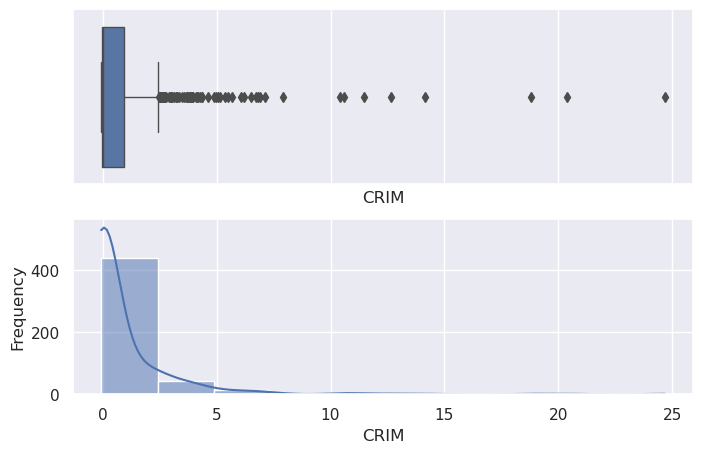

<Figure size 800x500 with 0 Axes>

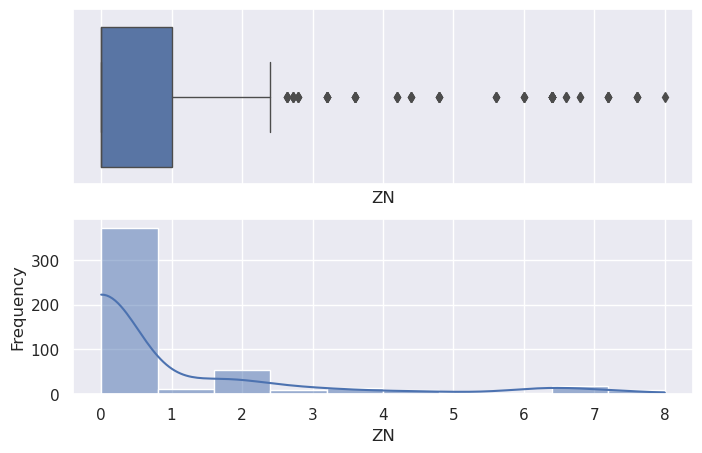

<Figure size 800x500 with 0 Axes>

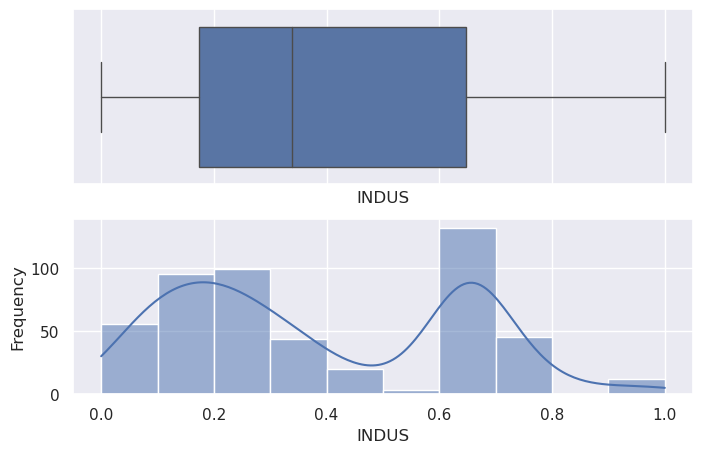

<Figure size 800x500 with 0 Axes>

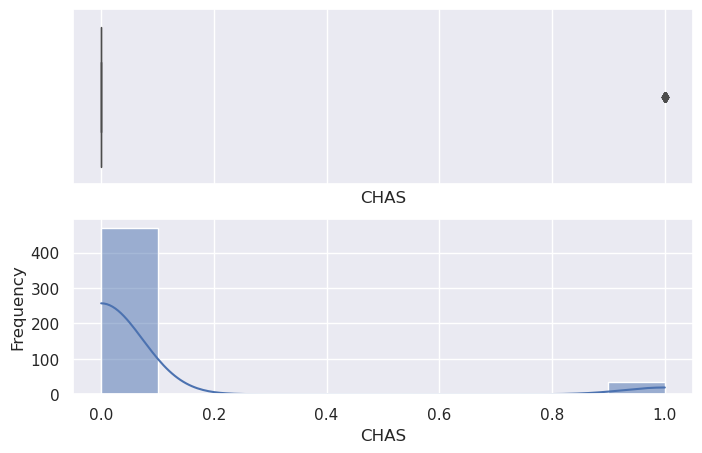

<Figure size 800x500 with 0 Axes>

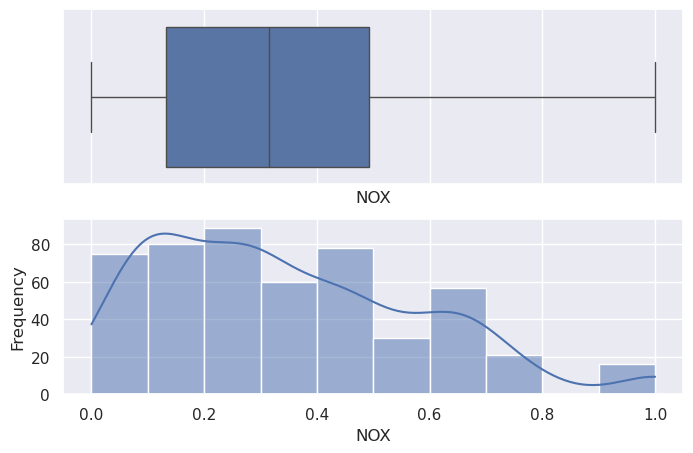

<Figure size 800x500 with 0 Axes>

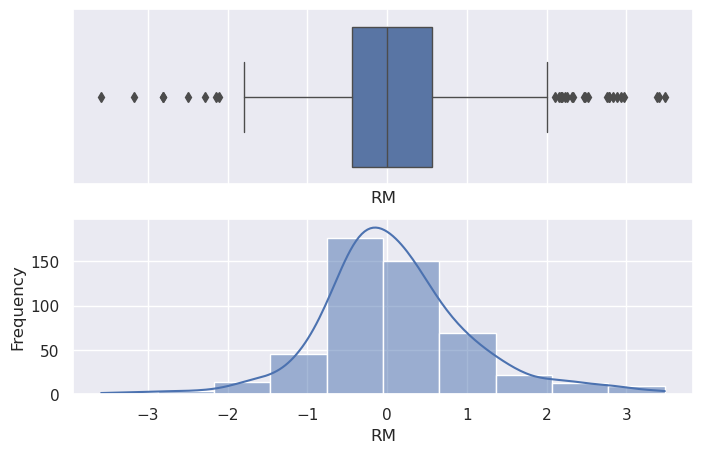

<Figure size 800x500 with 0 Axes>

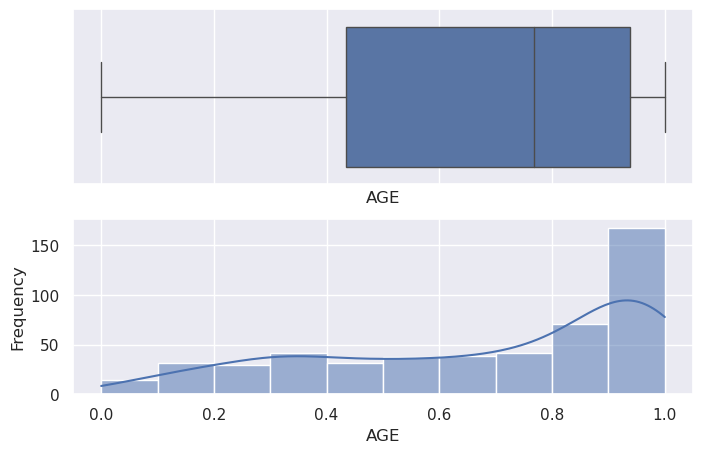

<Figure size 800x500 with 0 Axes>

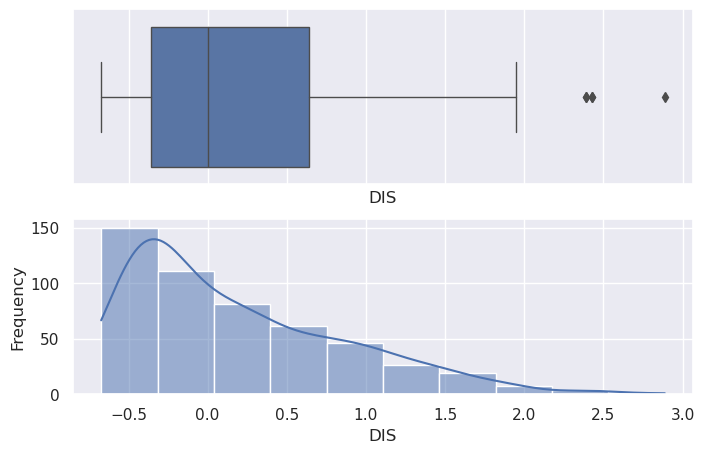

<Figure size 800x500 with 0 Axes>

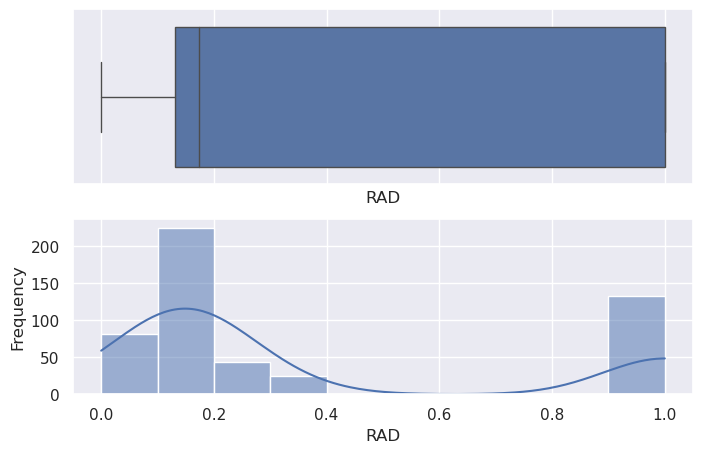

<Figure size 800x500 with 0 Axes>

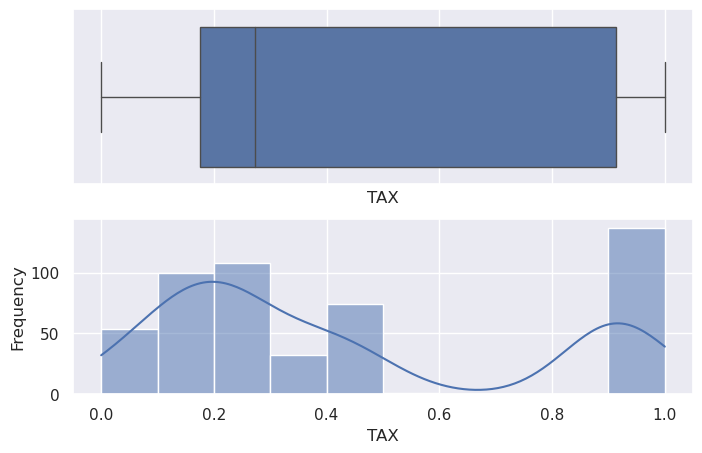

<Figure size 800x500 with 0 Axes>

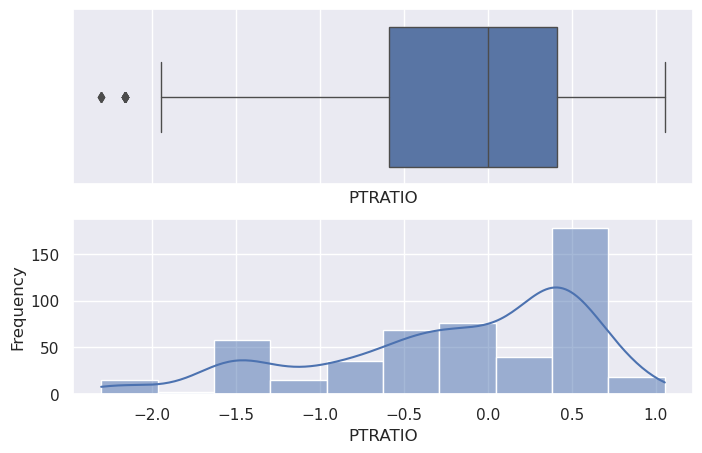

<Figure size 800x500 with 0 Axes>

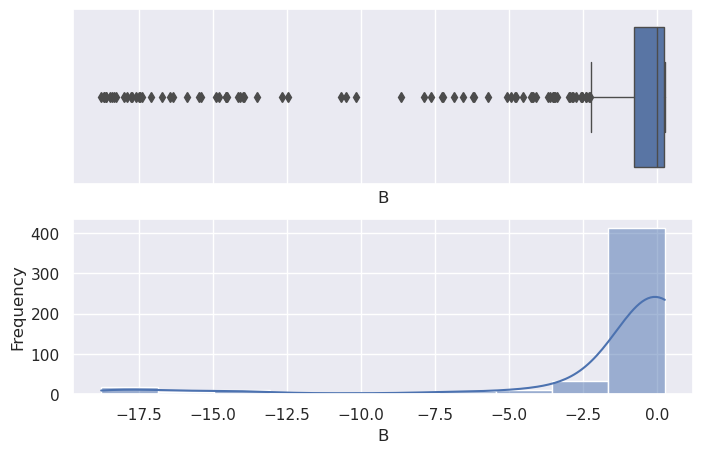

<Figure size 800x500 with 0 Axes>

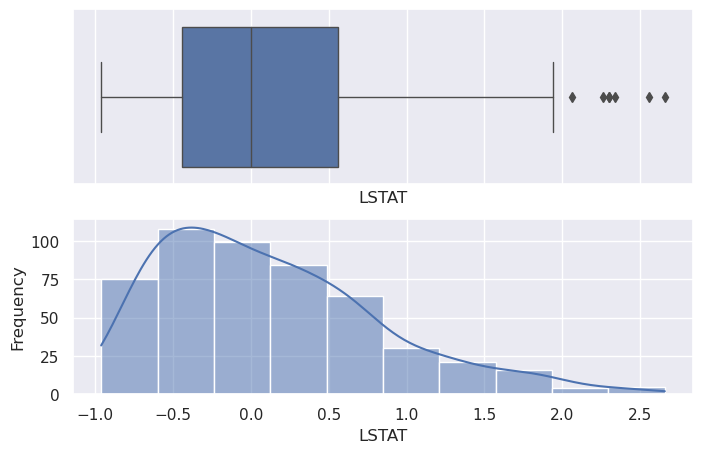

<Figure size 800x500 with 0 Axes>

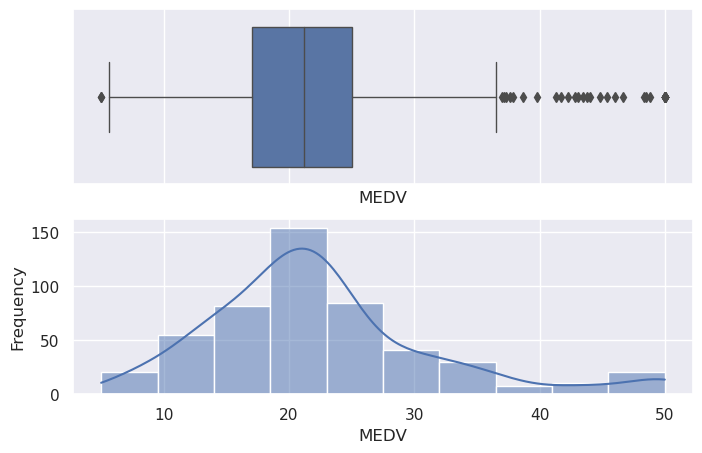

In [177]:
for i in df:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [178]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000
mean,9.337910e-01,0.909091,0.391378,0.069170,0.349167,0.103163,0.676364,1.902672e-01,0.371713,0.422208,-0.212309,-1.667632,1.292417e-01,22.532806
std,2.392616e+00,1.865796,0.251479,0.253994,0.238431,0.952056,0.289896,6.818457e-01,0.378576,0.321636,0.773195,4.379176,7.137493e-01,9.197104
min,-6.959315e-02,0.000000,0.000000,0.000000,0.000000,-3.587398,0.000000,-6.728244e-01,0.000000,0.000000,-2.303571,-18.761003,-9.625187e-01,5.000000
25%,-4.852940e-02,0.000000,0.173387,0.000000,0.131687,-0.437669,0.433831,-3.585445e-01,0.130435,0.175573,-0.589286,-0.770476,-4.407796e-01,17.025000
50%,-7.697835e-18,0.000000,0.338343,0.000000,0.314815,0.000000,0.768280,7.199102e-17,0.173913,0.272901,0.000000,0.000000,8.847090e-17,21.200000
75%,9.514706e-01,1.000000,0.646628,0.000000,0.491770,0.562331,0.938980,6.414555e-01,1.000000,0.914122,0.410714,0.229524,5.592204e-01,25.000000
max,2.467838e+01,8.000000,1.000000,1.000000,1.000000,3.484417,1.000000,2.888060e+00,1.000000,1.000000,1.053571,0.261902,2.659670e+00,50.000000
